In [ ]:
from google.colab import files

In [ ]:
file = files.upload()

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
X_train = df[df['Price'].notna()]
X_test = df[df['Price'].isna()]

In [ ]:
# Numeric
numeric_ = X_train.select_dtypes(exclude=['object']).copy()
numeric_.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [ ]:
# Categorical
cat_ = X_train.select_dtypes(include=['object']).copy()
cat_.columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


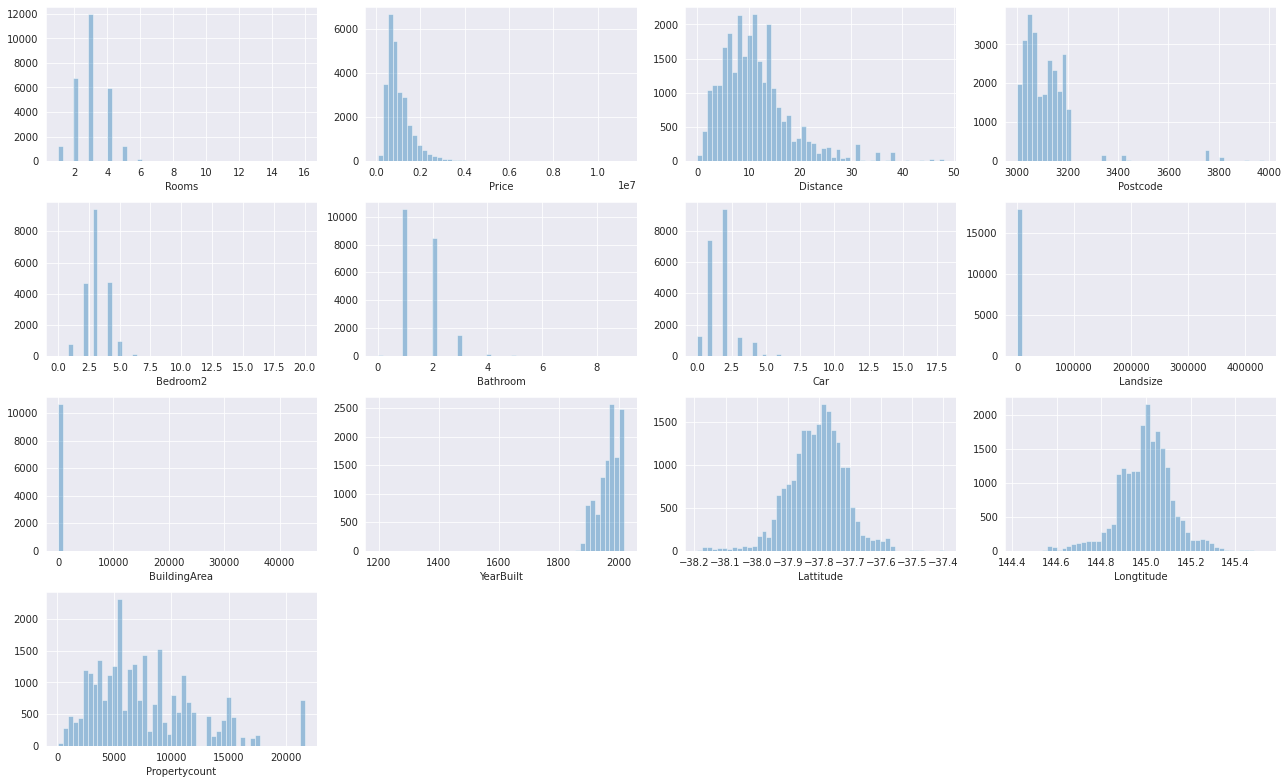

In [ ]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(numeric_):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

Looking for outliers

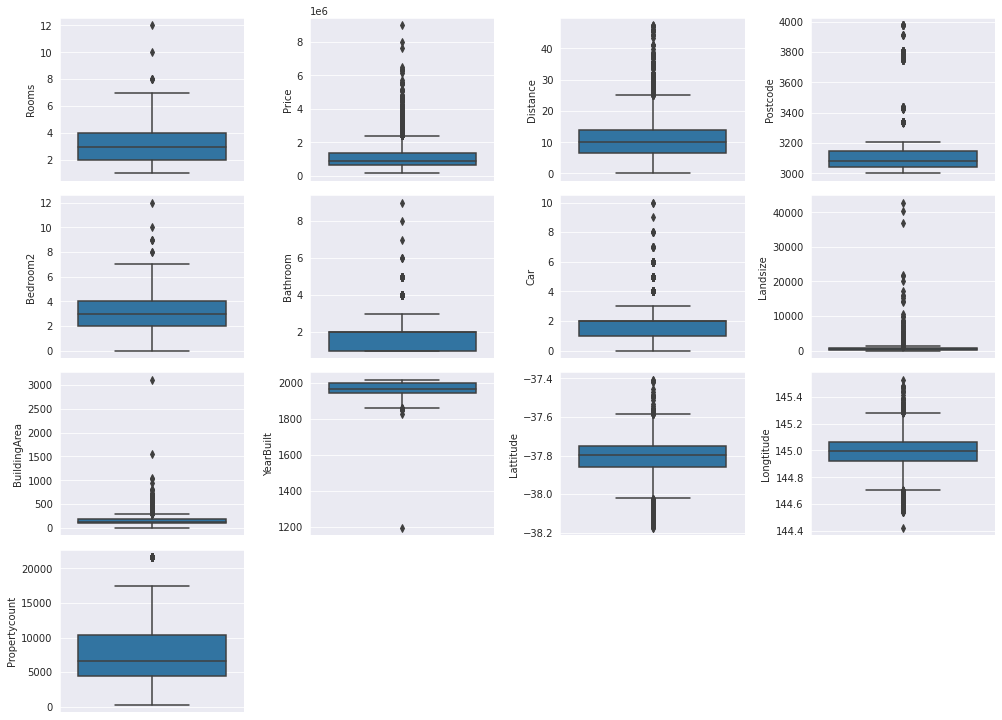

In [ ]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(numeric_):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

In [ ]:
columns_to_plot = ["Rooms", "Bathroom", "Car", "Bedroom2"]

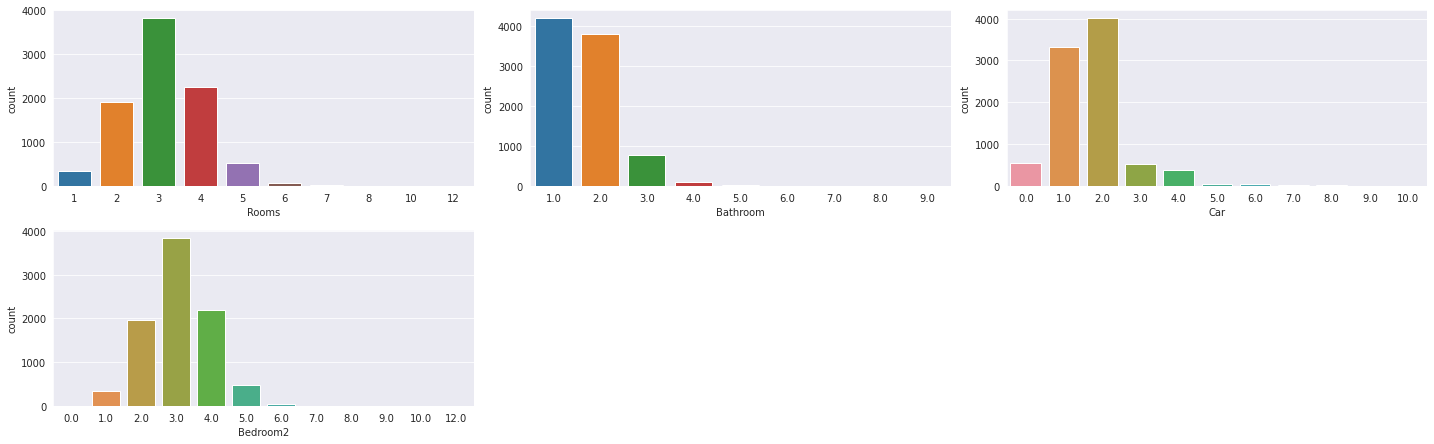

In [ ]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(columns_to_plot):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

In [ ]:
cat_.columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [ ]:
columns_to_plot = ['Type', 'Suburb', 'Regionname']

In [ ]:
X_train.Suburb.nunique()

345

In [ ]:
X_train.Regionname.nunique()

8

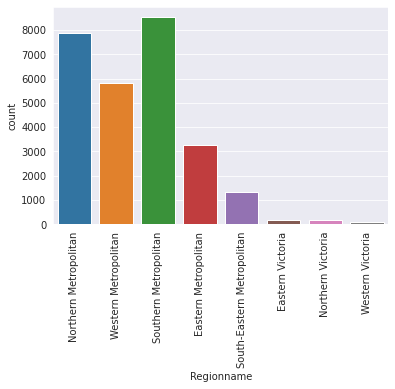

In [ ]:
sns.countplot(x=X_train['Regionname'])
plt.xticks(rotation='vertical')

fig.tight_layout()
plt.show()

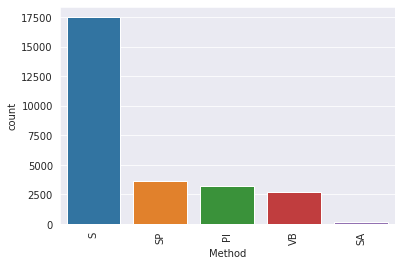

In [ ]:
sns.countplot(x=X_train['Method'])
plt.xticks(rotation='vertical')

fig.tight_layout()
plt.show()

Correlation Matrix

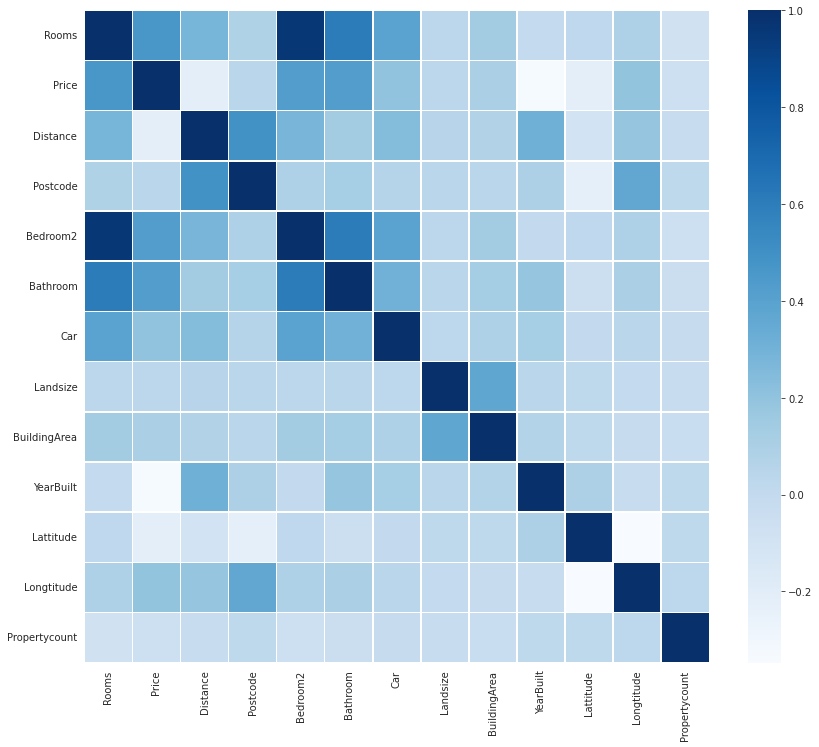

In [ ]:
plt.figure(figsize=(14,12))
correlation = numeric_.corr()
sns.heatmap(correlation, linewidth=0.5, cmap='Blues')

Strong correlation between Rooms and Bedroom2

In [ ]:
# Correlations between features and price
numeric_train = X_train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['Price']].sort_values(['Price'], ascending=False)

,Price
Price,1.000000
Rooms,0.465238
Bedroom2,0.430275
Bathroom,0.429878
Car,0.201803
Longtitude,0.197874
BuildingArea,0.100754
Postcode,0.044950
Landsize,0.032748
Propertycount,-0.059017


Num of Rooms including Bedroom2, Bathroom has high positive correlation with the price.
on the other hand, YearBuilt has negative correlation with the price.


### Check the missing values

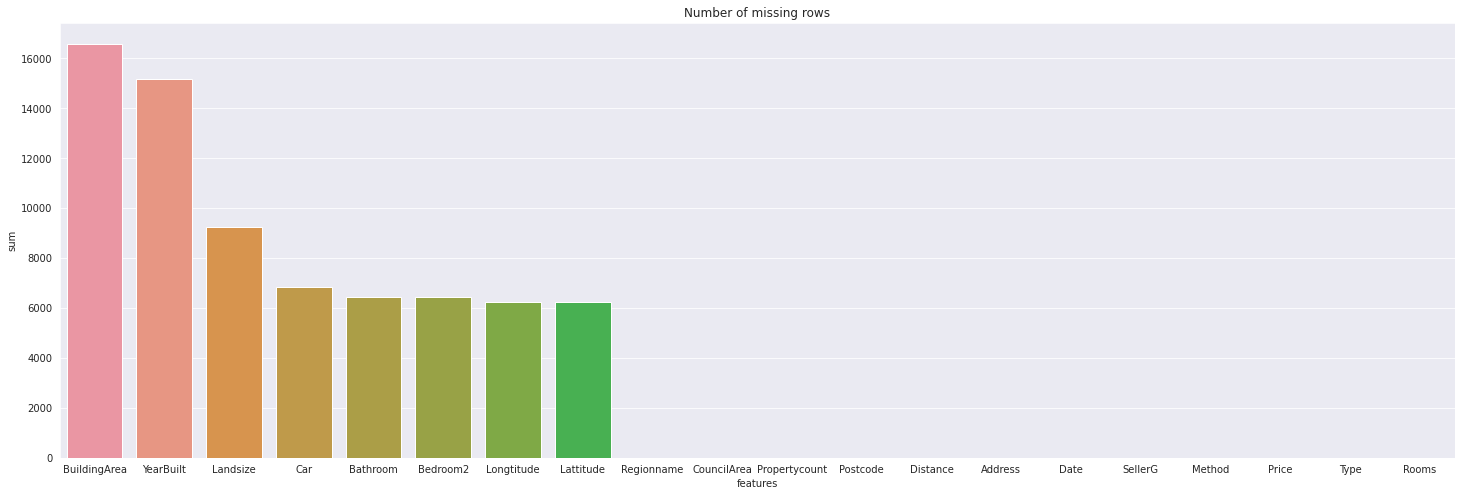

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(X_train.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

In [ ]:
percent_missing = X_train.isnull().sum() * 100 / len(X_train)
missing_value_df = pd.DataFrame({'column_name': X_train.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df

,column_name,percent_missing
Suburb,Suburb,0.000000
Address,Address,0.000000
Rooms,Rooms,0.000000
Type,Type,0.000000
Price,Price,0.000000
Method,Method,0.000000
SellerG,SellerG,0.000000
Date,Date,0.000000
Distance,Distance,0.003670
Postcode,Postcode,0.003670


Lattitude and Longtitude has 22% missing vals, one idea is to fill those by the postcode or Regionname in generel

We can remove BuildingArea because of its missing vals
but we want to keep YearBuilt because it has some correlation with the price

In [ ]:
X_train['YearBuilt'].hist(bins=25)

In [ ]:
X_train['YearBuilt'].unique()

We can fill the missing vals with 0 or use an algorithm like KNN to fill

In [ ]:
cat_.columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [ ]:
# Ordinal features
cat = ["CouncilArea",'Regionname']
X_train[cat] = X_train[cat].fillna('Missing')

In [ ]:
# Fill Bedroom2, Bathroom, Car with mode (we need discrete value)
# Groupby 
# mode stands for the value that seen the most

In [ ]:
cols_to_fill = ['Bedroom2','Bathroom', 'Car']
X_train[cols_to_fill] = X_train.groupby("Regionname")[cols_to_fill].transform(lambda x: x.fillna(x.mode()[0]))

Feature engineering 

New features:
* add day,month,year
* use bins over the YearBuilt feature
* calc total num of rooms in the house
* ratio between the rooms ( Rooms / Total rooms in the house)
* fill coordinates using region information
* extract street name from the address